# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import metrics
from io import StringIO
from csv import writer

# Read in csv files

In [2]:
matches = pd.read_csv('../csv/matches.csv')
players = pd.read_csv('../csv/players.csv')
hero_names = pd.read_json('../json/heroes.json')
cluster_regions = pd.read_csv('./Data/cluster_regions.csv')

In [3]:
matches

,radiant_win,duration,pre_game_duration,start_time,match_id,match_seq_num,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire,...,lobby_type,human_players,leagueid,positive_votes,negative_votes,game_mode,flags,engine,radiant_score,dire_score
0,False,2046,90,1601531395,5638004022,4737088298,0,2046,0,63,...,7,10,0,0,0,22,1,1,15,48
1,True,3276,90,1601530143,5637987771,4737088300,1792,256,63,51,...,7,10,0,0,0,22,1,1,39,43
2,False,1885,90,1601531504,5638005523,4737088303,0,2047,0,63,...,7,10,0,0,0,22,1,1,25,43
3,True,2949,90,1601530468,5637991917,4737088307,1975,0,63,0,...,7,10,0,0,0,22,1,1,44,26
4,True,1697,90,1601531745,5638008690,4737088311,1983,260,63,51,...,7,10,0,0,0,22,1,1,32,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114681,True,1896,90,1601563967,5638581611,4737616807,2047,0,63,0,...,7,10,0,0,0,22,1,1,36,24
114682,False,2839,90,1601562962,5638556592,4737616818,0,1846,0,63,...,7,10,0,0,0,22,1,1,53,59
114683,False,2152,90,1601563757,5638576427,4737616824,0,1974,0,63,...,7,10,0,0,0,22,1,1,24,45
114684,False,3233,90,1601562717,5638550541,4737616842,6,1828,3,63,...,7,10,0,0,0,22,1,1,33,47


In [4]:
players.head()

,account_id,player_slot,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,backpack_0,...,level,hero_damage,tower_damage,hero_healing,gold,gold_spent,scaled_hero_damage,scaled_tower_damage,scaled_hero_healing,match_id
0,118958418.0,0,106,36,41,185,166,50,75,0,...,14,13137,0,230,1187,7730,9761,0,131,5638004022
1,182795411.0,1,50,40,79,180,0,36,240,0,...,12,7450,0,2941,1004,5405,5990,0,2230,5638004022
2,286823668.0,2,21,0,166,50,21,77,485,0,...,16,16685,774,0,742,8670,12222,461,0,5638004022
3,86751423.0,3,1,147,63,143,75,145,0,0,...,20,4504,261,0,777,14290,3072,107,0,5638004022
4,97572781.0,4,5,254,36,43,214,39,0,0,...,15,6213,0,360,563,5560,4919,0,225,5638004022


In [5]:
hero_names.head()

,name,id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden


# Data info


## Hero Info
Most and least popular heroes

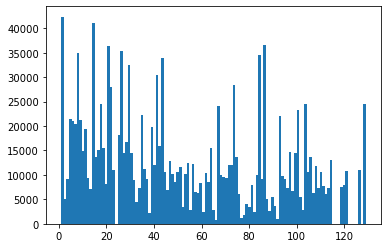

In [5]:
num_heroes = len(hero_names)
plt.hist(players['hero_id'], num_heroes)
plt.show()

In [6]:
hero_counts = players['hero_id'].value_counts().rename_axis('hero_id').reset_index(name='num_matches')
pd.merge(hero_counts, hero_names, left_on='hero_id', right_on='id')

,hero_id,num_matches,name,id,localized_name
0,14,41102,npc_dota_hero_pudge,14,Pudge
1,21,36301,npc_dota_hero_windrunner,21,Windranger
2,26,35346,npc_dota_hero_lion,26,Lion
3,8,35035,npc_dota_hero_juggernaut,8,Juggernaut
4,84,34504,npc_dota_hero_ogre_magi,84,Ogre Magi
...,...,...,...,...,...
114,38,2143,npc_dota_hero_beastmaster,38,Beastmaster
115,78,1788,npc_dota_hero_brewmaster,78,Brewmaster
116,77,1262,npc_dota_hero_lycan,77,Lycan
117,92,926,npc_dota_hero_visage,92,Visage


## Server Info
Where the most and least games are played

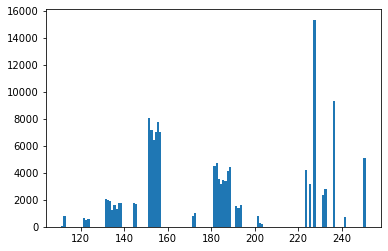

In [7]:
plt.hist(matches['cluster'], bins=np.arange(matches['cluster'].min(), matches['cluster'].max()+1))
plt.show()

In [19]:
cluster_counts = matches['cluster'].value_counts().rename_axis('cluster').reset_index(name='num_matches')
pd.merge(cluster_counts, cluster_regions, on='cluster')

,cluster,num_matches,region
0,227,405,PW TELECOM WUHAN
1,251,199,PERU
2,182,120,STOCKHOLM
3,181,115,STOCKHOLM
4,151,111,SINGAPORE
5,188,110,STOCKHOLM
6,154,110,SINGAPORE
7,187,108,STOCKHOLM
8,186,103,STOCKHOLM
9,156,99,SINGAPORE


In [8]:
short_players = players.iloc[:, :11]
short_players.insert(short_players.shape[1], 'win', value=False)
short_players

,account_id,player_slot,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,backpack_0,backpack_1,win
0,1.189584e+08,0,106,36,41,185,166,50,75,0,0,False
1,1.827954e+08,1,50,40,79,180,0,36,240,0,0,False
2,2.868237e+08,2,21,0,166,50,21,77,485,0,0,False
3,8.675142e+07,3,1,147,63,143,75,145,0,0,0,False
4,9.757278e+07,4,5,254,36,43,214,39,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1453435,1.368694e+08,128,128,73,36,108,116,29,1,237,41,False
1453436,3.854890e+08,129,25,190,232,244,100,214,40,38,0,False
1453437,3.470254e+08,130,27,90,36,0,100,40,214,244,0,False
1453438,4.294967e+09,131,54,210,151,135,50,208,112,38,0,False


In [9]:
# short_matches = matches.iloc[:1000]
for index, row in matches.iterrows():
    offset = 10 * index
    short_players.at[0 + offset, 'win'] = row.radiant_win
    short_players.at[1 + offset, 'win'] = row.radiant_win
    short_players.at[2 + offset, 'win'] = row.radiant_win
    short_players.at[3 + offset, 'win'] = row.radiant_win
    short_players.at[4 + offset, 'win'] = row.radiant_win

    short_players.at[5 + offset, 'win'] = not row.radiant_win
    short_players.at[6 + offset, 'win'] = not row.radiant_win
    short_players.at[7 + offset, 'win'] = not row.radiant_win
    short_players.at[8 + offset, 'win'] = not row.radiant_win
    short_players.at[9 + offset, 'win'] = not row.radiant_win
    # print(index)

short_players.head(20)

,account_id,player_slot,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,backpack_0,backpack_1,win
0,1.189584e+08,0,106,36,41,185,166,50,75,0,0,False
1,1.827954e+08,1,50,40,79,180,0,36,240,0,0,False
2,2.868237e+08,2,21,0,166,50,21,77,485,0,0,False
3,8.675142e+07,3,1,147,63,143,75,145,0,0,0,False
4,9.757278e+07,4,5,254,36,43,214,39,0,0,0,False
5,1.549157e+08,128,87,218,180,88,254,36,108,0,0,True
6,3.767162e+07,129,35,172,158,149,236,135,63,0,0,True
7,4.294967e+09,130,22,77,108,232,259,110,29,0,0,True
8,7.033140e+07,131,62,229,50,181,36,112,0,0,0,True
9,1.700655e+08,132,120,208,63,5,23,158,26,21,155,True


In [22]:
short_players.tail()

,match_id,player_slot,hero_id,leaver_status,win
31095,5675296254,128,31,0,True
31096,5675296254,129,74,0,True
31097,5675296254,130,22,0,True
31098,5675296254,131,19,0,True
31099,5675296254,132,6,0,True


In [8]:
hero_match_wins = short_players.groupby(by='hero_id').sum()['win']
hero_match_count = players['hero_id'].value_counts().rename_axis('hero_id').reset_index(name='total_matches')
hero_match_count = hero_match_count.merge(hero_match_wins, on='hero_id')
hero_match_count

,hero_id,total_matches,win
0,44,1704,739.0
1,14,1478,653.0
2,8,1417,783.0
3,21,1407,669.0
4,74,1399,690.0
...,...,...,...
114,72,116,56.0
115,92,115,71.0
116,15,114,56.0
117,89,94,41.0


In [9]:
hero_match_count['win_percent'] = hero_match_count['win'] / hero_match_count['total_matches'] * 100
hero_match_count

,hero_id,total_matches,win,win_percent
0,44,1704,739.0,43.368545
1,14,1478,653.0,44.181326
2,8,1417,783.0,55.257586
3,21,1407,669.0,47.547974
4,74,1399,690.0,49.320944
...,...,...,...,...
114,72,116,56.0,48.275862
115,92,115,71.0,61.739130
116,15,114,56.0,49.122807
117,89,94,41.0,43.617021


In [10]:
hero_match_count = pd.merge(hero_match_count, hero_names, left_on='hero_id', right_on='id')
hero_match_count

,hero_id,total_matches,win,win_percent,name,id,localized_name
0,44,1704,739.0,43.368545,npc_dota_hero_phantom_assassin,44,Phantom Assassin
1,14,1478,653.0,44.181326,npc_dota_hero_pudge,14,Pudge
2,8,1417,783.0,55.257586,npc_dota_hero_juggernaut,8,Juggernaut
3,21,1407,669.0,47.547974,npc_dota_hero_windrunner,21,Windranger
4,74,1399,690.0,49.320944,npc_dota_hero_invoker,74,Invoker
...,...,...,...,...,...,...,...
114,72,116,56.0,48.275862,npc_dota_hero_gyrocopter,72,Gyrocopter
115,92,115,71.0,61.739130,npc_dota_hero_visage,92,Visage
116,15,114,56.0,49.122807,npc_dota_hero_razor,15,Razor
117,89,94,41.0,43.617021,npc_dota_hero_naga_siren,89,Naga Siren


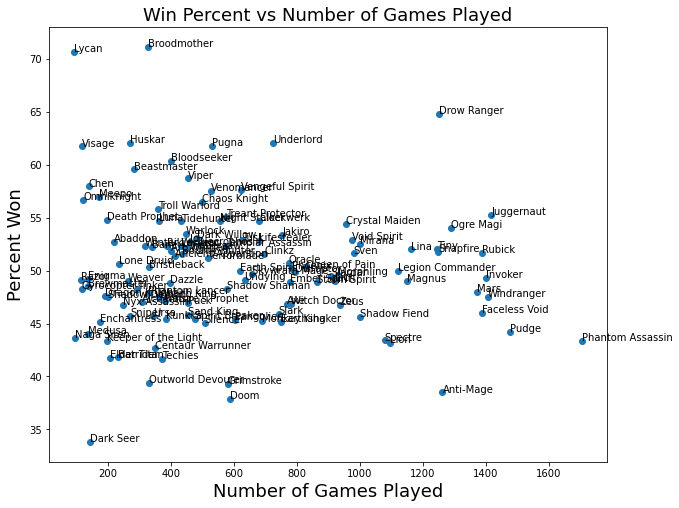

In [11]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size


x = hero_match_count['total_matches']
y = hero_match_count['win_percent']
labels = hero_match_count['localized_name']


plt.scatter(x, y)
plt.title('Win Percent vs Number of Games Played', fontsize=18)
plt.xlabel('Number of Games Played', fontsize=18)
plt.ylabel('Percent Won', fontsize=18)

for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]))

# Data cleaning
We start with an empty list of DataFrams and add to it as we create DataFrames of bad match ids. In the end we combine all the DataFrames and remove their match ids from the Matches DataFrame.

In [10]:
dfs_bad_matches = []

## Abandons
remove games were a player has abandoned the match

In [11]:
abandoned_matches = players[players.leaver_status > 1][['match_id']]
abandoned_matches = abandoned_matches.drop_duplicates().reset_index(drop=True)
dfs_bad_matches.append(abandoned_matches)
abandoned_matches

,match_id
0,5637988694
1,5637993752
2,5638009454
3,5638010111
4,5637998626
...,...
12616,5638577526
12617,5638564404
12618,5638573928
12619,5638573961


## Missing Hero id
remove games where a player is not assigned a hero id, but didnt get flaged for an abandon

In [12]:
player_no_hero = players[players.hero_id == 0][['match_id']].reset_index(drop=True)
dfs_bad_matches.append(player_no_hero)
player_no_hero

,match_id


## Wrong Game Mode
remove games not played in "Ranked All Pick" (22)

In [13]:
wrong_mode = matches[matches.game_mode != 22].reset_index()[['match_id']]
dfs_bad_matches.append(wrong_mode)
wrong_mode

,match_id
0,5637994973
1,5637997757
2,5638009787
3,5638009723
4,5638000592
...,...
17639,5638573786
17640,5638539163
17641,5638585074
17642,5638563745


## Game length (short)
remove games we deem too short (< 15 min)

In [14]:
short_length = 15 * 60
short_matches = matches[matches.duration < short_length].reset_index()[['match_id']]
dfs_bad_matches.append(short_matches)
short_matches

,match_id
0,5638029717
1,5638033963
2,5638025782
3,5638025108
4,5638033696
...,...
255,5638600319
256,5638592730
257,5638603636
258,5638599886


## Game length (long)
Next we want to get matches with a too long duration (>90 min)

In [15]:
long_length = 90 * 60
long_matches = matches[matches.duration > long_length].reset_index()[['match_id']]
dfs_bad_matches.append(long_matches)
long_matches

,match_id
0,5637973297
1,5637989620
2,5637988838
3,5637997701
4,5638016665
5,5638034713
6,5638037476
7,5638040033
8,5638047250
9,5638060270


## Combine all our lists of bad matches
combine matches and create a filtered match dataframe with only good matches

In [16]:
bad_match_ids = pd.concat(dfs_bad_matches, ignore_index=True).drop_duplicates()
bad_match_ids

,match_id
0,5637988694
1,5637993752
2,5638009454
3,5638010111
4,5637998626
...,...
30551,5638371233
30552,5638384843
30553,5638402860
30554,5638414838


## Remove bad matches

In [17]:
filtered_matches = matches[~matches['match_id'].isin(bad_match_ids['match_id'])]
filtered_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115823 entries, 0 to 145324
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   radiant_win              115823 non-null  bool 
 1   duration                 115823 non-null  int64
 2   pre_game_duration        115823 non-null  int64
 3   start_time               115823 non-null  int64
 4   match_id                 115823 non-null  int64
 5   match_seq_num            115823 non-null  int64
 6   tower_status_radiant     115823 non-null  int64
 7   tower_status_dire        115823 non-null  int64
 8   barracks_status_radiant  115823 non-null  int64
 9   barracks_status_dire     115823 non-null  int64
 10  cluster                  115823 non-null  int64
 11  first_blood_time         115823 non-null  int64
 12  lobby_type               115823 non-null  int64
 13  human_players            115823 non-null  int64
 14  leagueid                 115823 non-

## Remove duplicate matches

In [18]:
filtered_matches = filtered_matches.drop_duplicates(subset=['match_id'])
filtered_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114686 entries, 0 to 145324
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   radiant_win              114686 non-null  bool 
 1   duration                 114686 non-null  int64
 2   pre_game_duration        114686 non-null  int64
 3   start_time               114686 non-null  int64
 4   match_id                 114686 non-null  int64
 5   match_seq_num            114686 non-null  int64
 6   tower_status_radiant     114686 non-null  int64
 7   tower_status_dire        114686 non-null  int64
 8   barracks_status_radiant  114686 non-null  int64
 9   barracks_status_dire     114686 non-null  int64
 10  cluster                  114686 non-null  int64
 11  first_blood_time         114686 non-null  int64
 12  lobby_type               114686 non-null  int64
 13  human_players            114686 non-null  int64
 14  leagueid                 114686 non-

In [20]:
filtered_players =  players[~players['match_id'].isin(bad_match_ids['match_id'])]
filtered_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1158370 entries, 0 to 1453439
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   account_id           1158308 non-null  float64
 1   player_slot          1158370 non-null  int64  
 2   hero_id              1158370 non-null  int64  
 3   item_0               1158370 non-null  int64  
 4   item_1               1158370 non-null  int64  
 5   item_2               1158370 non-null  int64  
 6   item_3               1158370 non-null  int64  
 7   item_4               1158370 non-null  int64  
 8   item_5               1158370 non-null  int64  
 9   backpack_0           1158370 non-null  int64  
 10  backpack_1           1158370 non-null  int64  
 11  backpack_2           1158370 non-null  int64  
 12  item_neutral         1158370 non-null  int64  
 13  kills                1158370 non-null  int64  
 14  deaths               1158370 non-null  int64  
 15

In [21]:
filtered_players = filtered_players.drop_duplicates(subset=['match_id', 'player_slot'])
filtered_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146860 entries, 0 to 1453439
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   account_id           1146801 non-null  float64
 1   player_slot          1146860 non-null  int64  
 2   hero_id              1146860 non-null  int64  
 3   item_0               1146860 non-null  int64  
 4   item_1               1146860 non-null  int64  
 5   item_2               1146860 non-null  int64  
 6   item_3               1146860 non-null  int64  
 7   item_4               1146860 non-null  int64  
 8   item_5               1146860 non-null  int64  
 9   backpack_0           1146860 non-null  int64  
 10  backpack_1           1146860 non-null  int64  
 11  backpack_2           1146860 non-null  int64  
 12  item_neutral         1146860 non-null  int64  
 13  kills                1146860 non-null  int64  
 14  deaths               1146860 non-null  int64  
 15

In [23]:
filtered_players.to_csv('../csv/players_filtered.csv', index=False)

In [24]:
filtered_matches.to_csv('../csv/matches_filtered.csv', index=False)

# Convert our match list

Convert our match list to the form of :
r_1, r_2, r_3, r_4, r_5, d_1, d_2, d_3, d_4, d_5, r_win


In [15]:
r_names = []
d_names = []
for slot in range(1, 6):
    r_name = 'r_' + str(slot)
    d_name = 'd_' + str(slot)
    r_names.append(r_name)
    d_names.append(d_name)

columns = (r_names + d_names + ['r_win'])

new_row = [-1] * (5 + 5 + 1)

# test_players = players.iloc[:500, :]
# test_matches = matches.iloc[:50, :]

columns = (r_names + d_names + ['r_win'])
new_match_list = pd.DataFrame(data=None, columns=columns)

output = StringIO()
csv_writer = writer(output)
for index, row in filtered_matches.iterrows():
    match_players = players.loc[players['match_id'] == row['match_id']]

    if match_players.shape[0] == 10:

        new_row[0] = match_players[match_players['player_slot'] == 0].iloc[0]['hero_id']
        new_row[1] = match_players[match_players['player_slot'] == 1].iloc[0]['hero_id']
        new_row[2] = match_players[match_players['player_slot'] == 2].iloc[0]['hero_id']
        new_row[3] = match_players[match_players['player_slot'] == 3].iloc[0]['hero_id']
        new_row[4] = match_players[match_players['player_slot'] == 4].iloc[0]['hero_id']

        new_row[5] = match_players[match_players['player_slot'] == 128].iloc[0]['hero_id']
        new_row[6] = match_players[match_players['player_slot'] == 129].iloc[0]['hero_id']
        new_row[7] = match_players[match_players['player_slot'] == 130].iloc[0]['hero_id']
        new_row[8] = match_players[match_players['player_slot'] == 131].iloc[0]['hero_id']
        new_row[9] = match_players[match_players['player_slot'] == 132].iloc[0]['hero_id']

        # add if radiant win
        new_row[10] = row['radiant_win']
        
        # append new row onto match list
        csv_writer.writerow(new_row)

        # gives us some idea about how far into the data we are
        if index % 1000 == 0:
            print(index / 1000)

output.seek(0)
new_match_list = pd.read_csv(output, names=columns)
new_match_list.to_csv('./Data_new/new_match_list_filtered_ids.csv', index=False)

# Stats

In [6]:
players

,account_id,player_slot,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,backpack_0,...,level,hero_damage,tower_damage,hero_healing,gold,gold_spent,scaled_hero_damage,scaled_tower_damage,scaled_hero_healing,match_id
0,1.189584e+08,0,106,36,41,185,166,50,75,0,...,14,13137,0,230,1187,7730,9761,0,131,5638004022
1,1.827954e+08,1,50,40,79,180,0,36,240,0,...,12,7450,0,2941,1004,5405,5990,0,2230,5638004022
2,2.868237e+08,2,21,0,166,50,21,77,485,0,...,16,16685,774,0,742,8670,12222,461,0,5638004022
3,8.675142e+07,3,1,147,63,143,75,145,0,0,...,20,4504,261,0,777,14290,3072,107,0,5638004022
4,9.757278e+07,4,5,254,36,43,214,39,0,0,...,15,6213,0,360,563,5560,4919,0,225,5638004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146855,1.368694e+08,128,128,73,36,108,116,29,1,237,...,21,20953,4048,0,4778,13335,15375,2221,0,5638568652
1146856,3.854890e+08,129,25,190,232,244,100,214,40,38,...,16,8189,837,0,1942,10485,7917,316,0,5638568652
1146857,3.470254e+08,130,27,90,36,0,100,40,214,244,...,18,8037,3132,0,1715,11515,5952,1292,0,5638568652
1146858,4.294967e+09,131,54,210,151,135,50,208,112,38,...,26,21382,16271,623,968,27100,12676,7531,261,5638568652


In [13]:
player_stats = players.drop(columns=['account_id', 'match_id', 'leaver_status'])

In [78]:
player_stats_short = player_stats.drop(columns=['item_0','item_1','item_2','item_3','item_4','item_5','backpack_0','backpack_1','backpack_2','item_neutral', 'player_slot']).groupby(['hero_id']).mean()
player_stats_short

,kills,deaths,assists,last_hits,denies,gold_per_min,xp_per_min,level,hero_damage,tower_damage,hero_healing,gold,gold_spent,scaled_hero_damage,scaled_tower_damage,scaled_hero_healing
hero_id,,,,,,,,,,,,,,,,
1,8.675267,4.859375,7.561832,371.550216,13.516550,626.356548,740.880654,24.760228,23169.864823,6555.929533,16.092414,2718.253289,22193.473479,12424.038857,3111.957288,7.189453
2,8.322996,8.836791,12.785470,168.552450,6.469316,425.323506,579.971318,21.993376,24440.520274,1419.130887,29.959161,1892.854117,14501.901798,14598.426003,671.724612,15.756643
3,3.498289,7.864175,14.292709,36.738352,4.593840,273.507502,459.105554,19.244801,10885.058173,542.437747,256.378784,1511.997894,9400.752830,7438.810213,261.834693,155.781258
4,8.350436,7.021009,14.046163,207.254109,9.082893,467.832214,625.208947,23.168072,25823.489210,2709.990424,501.167500,2103.032585,16726.050450,14627.854652,1325.710304,191.960983
5,4.059540,9.346789,15.458882,68.015073,3.315431,307.107184,475.216043,19.712693,15871.075595,676.429083,218.370293,1512.974879,10614.637041,10089.673077,328.381670,131.204031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,6.237104,7.483530,14.604257,210.068055,7.746271,450.957582,606.884245,22.409416,22640.111249,1488.733064,1131.829397,1815.443909,15833.617154,13033.553760,720.988813,410.298477
121,4.246045,8.543974,17.029200,73.589577,3.105398,313.444974,475.557701,19.729758,15445.834225,527.885761,396.286412,1698.255700,10773.610400,9431.192764,256.940786,218.044439
126,9.236737,6.517276,13.266942,179.393000,9.621155,452.766607,634.446389,22.780874,26006.951293,1778.546144,100.536893,1880.674320,15694.047593,15886.279648,873.157490,55.530874


In [94]:
player_stats_short.reset_index().to_json('../json/hero_stats.json', orient='records', indent=4)

In [38]:
player_items = player_stats.melt(id_vars=['hero_id'], value_vars=['item_0', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5'], var_name='item_slot', value_name='item_id')
player_items

,hero_id,item_slot,item_id
0,106,item_0,36
1,50,item_0,40
2,21,item_0,0
3,1,item_0,147
4,5,item_0,254
...,...,...,...
6881155,128,item_5,1
6881156,25,item_5,40
6881157,27,item_5,214
6881158,54,item_5,112


In [62]:
item_counts = player_items.groupby(['hero_id']).item_id.value_counts().reset_index(name="count")
item_counts

,hero_id,item_id,count
0,1,145,18506
1,1,147,17245
2,1,63,16292
3,1,208,12356
4,1,75,8628
...,...,...,...
18637,129,193,1
18638,129,203,1
18639,129,236,1
18640,129,243,1


In [92]:
j = (item_counts.groupby(['hero_id'], as_index=True)
             .apply(lambda x: x[['item_id','count']].to_dict('r'))
             .reset_index()
             .rename(columns={0:'item_data'})
             .to_json('../json/item_stats.json', orient='records', indent=4))